In [37]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from google.colab import drive
from scipy import stats

warnings.filterwarnings('ignore')
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
#Setup Enviornment 

DATASET_PATH = "/content/gdrive/MyDrive/Estudos/Pos-graduacao - Ciencia de Dados e  Analytics/Sprints/sprint I - Analise de salarios cientista de dados/data_science_job_market_analysis/Dataset"
os.chdir(DATASET_PATH)

In [39]:
h1bdata_df = pd.read_csv("EUA/USA_data_science_jobs_h1bdata.csv", delimiter=',')
glassdoor_df = pd.read_csv("Jobs_descriptions_EUA/DataScientist_glassdoor.csv")


## Cleaning h1bdata dataset

In [40]:
h1bdata_df.head(20)

,Unnamed: 0,company,title,salary,location,date
0,0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,"45,980","ORLANDO, FL",04/09/2020
1,1,PERCOLATA CORPORATION,DATA SCIENTIST,"46,060","PALO ALTO, CA",03/18/2016
2,2,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015
3,3,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015
4,4,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,"50,000","JOHNS CREEK, GA",03/16/2017
5,5,YONO HEALTH INC,DATA SCIENTIST,"50,220","SUNNYVALE, CA",02/28/2017
6,6,EONUM INC,DATA SCIENTIST,"51,100","IRVINE, CA",04/08/2021
7,7,EONUM INC,DATA SCIENTIST,"51,100","IRVINE, CA",04/12/2021
8,8,EONUM INC,DATA SCIENTIST,"51,100","IRVINE, CA",04/16/2021
9,9,OPEN DATA GROUP INC,DATA SCIENTIST,"51,860","CHICAGO, IL",02/28/2019


In [41]:
h1bdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82431 entries, 0 to 82430
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  82431 non-null  int64 
 1   company     82430 non-null  object
 2   title       82396 non-null  object
 3   salary      82396 non-null  object
 4   location    82396 non-null  object
 5   date        82396 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.8+ MB


### Cleaning Blank lines

In [42]:
h1bdata_clean_df = h1bdata_df.dropna(how='any')
h1bdata_clean_df.head(20)

,Unnamed: 0,company,title,salary,location,date
0,0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,"45,980","ORLANDO, FL",04/09/2020
1,1,PERCOLATA CORPORATION,DATA SCIENTIST,"46,060","PALO ALTO, CA",03/18/2016
2,2,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015
3,3,MY LIFE REGISTRY LLC,DATA SCIENTIST,"47,960","FORT LEE, NJ",02/18/2015
4,4,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,"50,000","JOHNS CREEK, GA",03/16/2017
5,5,YONO HEALTH INC,DATA SCIENTIST,"50,220","SUNNYVALE, CA",02/28/2017
6,6,EONUM INC,DATA SCIENTIST,"51,100","IRVINE, CA",04/08/2021
7,7,EONUM INC,DATA SCIENTIST,"51,100","IRVINE, CA",04/12/2021
8,8,EONUM INC,DATA SCIENTIST,"51,100","IRVINE, CA",04/16/2021
9,9,OPEN DATA GROUP INC,DATA SCIENTIST,"51,860","CHICAGO, IL",02/28/2019


In [43]:
h1bdata_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82395 entries, 0 to 82430
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  82395 non-null  int64 
 1   company     82395 non-null  object
 2   title       82395 non-null  object
 3   salary      82395 non-null  object
 4   location    82395 non-null  object
 5   date        82395 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.4+ MB


### Looking for any line with "null"

In [44]:
h1bdata_clean_df.isnull().sum()

Unnamed: 0    0
company       0
title         0
salary        0
location      0
date          0
dtype: int64

In [45]:
h1bdata_clean_df.isin(["null"]).sum()

Unnamed: 0    0
company       0
title         0
salary        0
location      0
date          0
dtype: int64

In [46]:
h1bdata_clean_df['title'].value_counts()

BUSINESS ANALYST    39586
DATA SCIENTIST      16953
DATA ANALYST        11685
DATA ENGINEER       10887
DATA ARCHITECT       1582
STATISTICIAN         1041
BI ANALYST            661
Name: title, dtype: int64

### Converting Salaries to right format

In [47]:
#one extra thing, we have need getting rid of commas:
h1bdata_clean_df ["salary"] = h1bdata_clean_df ["salary"].apply(lambda x: x.replace(",",""))

In [48]:
h1bdata_clean_df ["salary"] = h1bdata_clean_df ["salary"].astype(np.float64)

In [49]:
h1bdata_clean_df ["salary"]

0         45980.0
1         46060.0
2         47960.0
3         47960.0
4         50000.0
           ...   
82426    183000.0
82427    200476.0
82428    200476.0
82429    216000.0
82430    225000.0
Name: salary, Length: 82395, dtype: float64

## Outliers Elimination

### Test With z_score( |z| < 3)

(0.0, 250000.0)

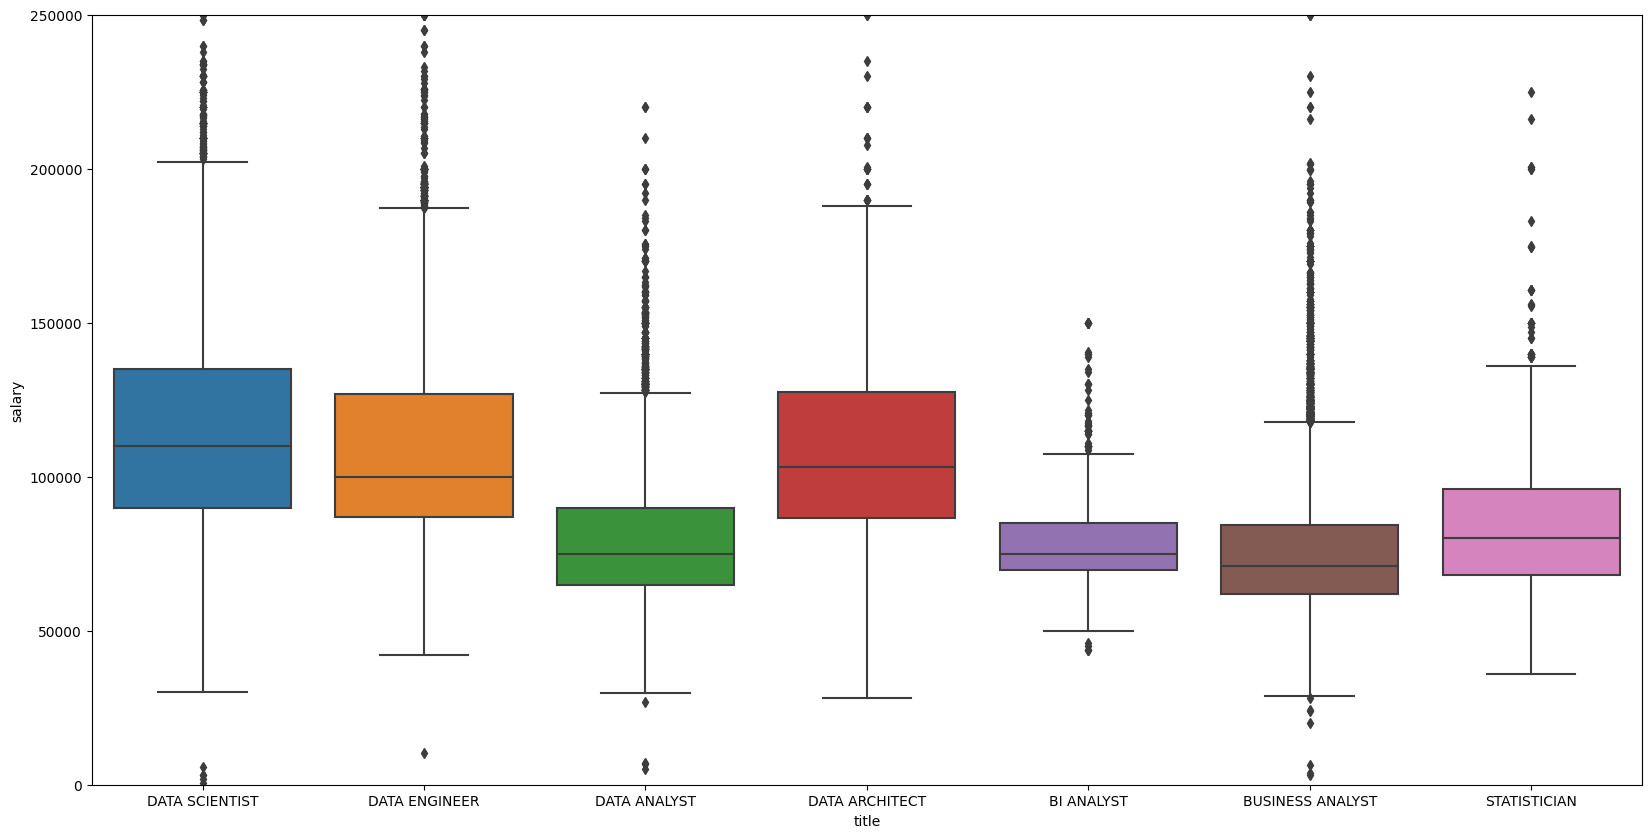

In [50]:
plt.figure(figsize=(20,10))
sns.boxplot(data=h1bdata_clean_df, y="salary",x='title')
plt.ylim([0,2.5e5])

(0.0, 300000.0)

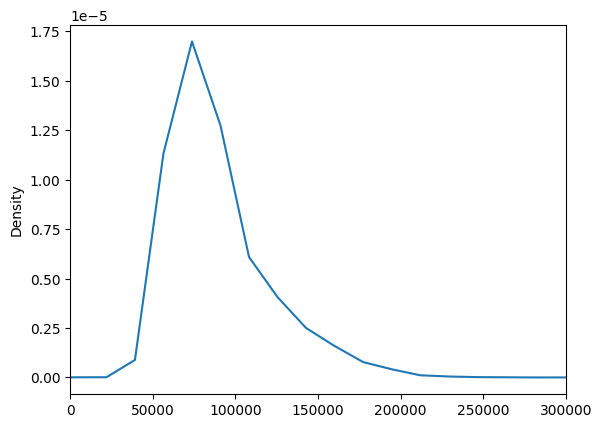

In [51]:
h1bdata_clean_df['salary'].plot(kind='density')
plt.xlim([0,3e5])

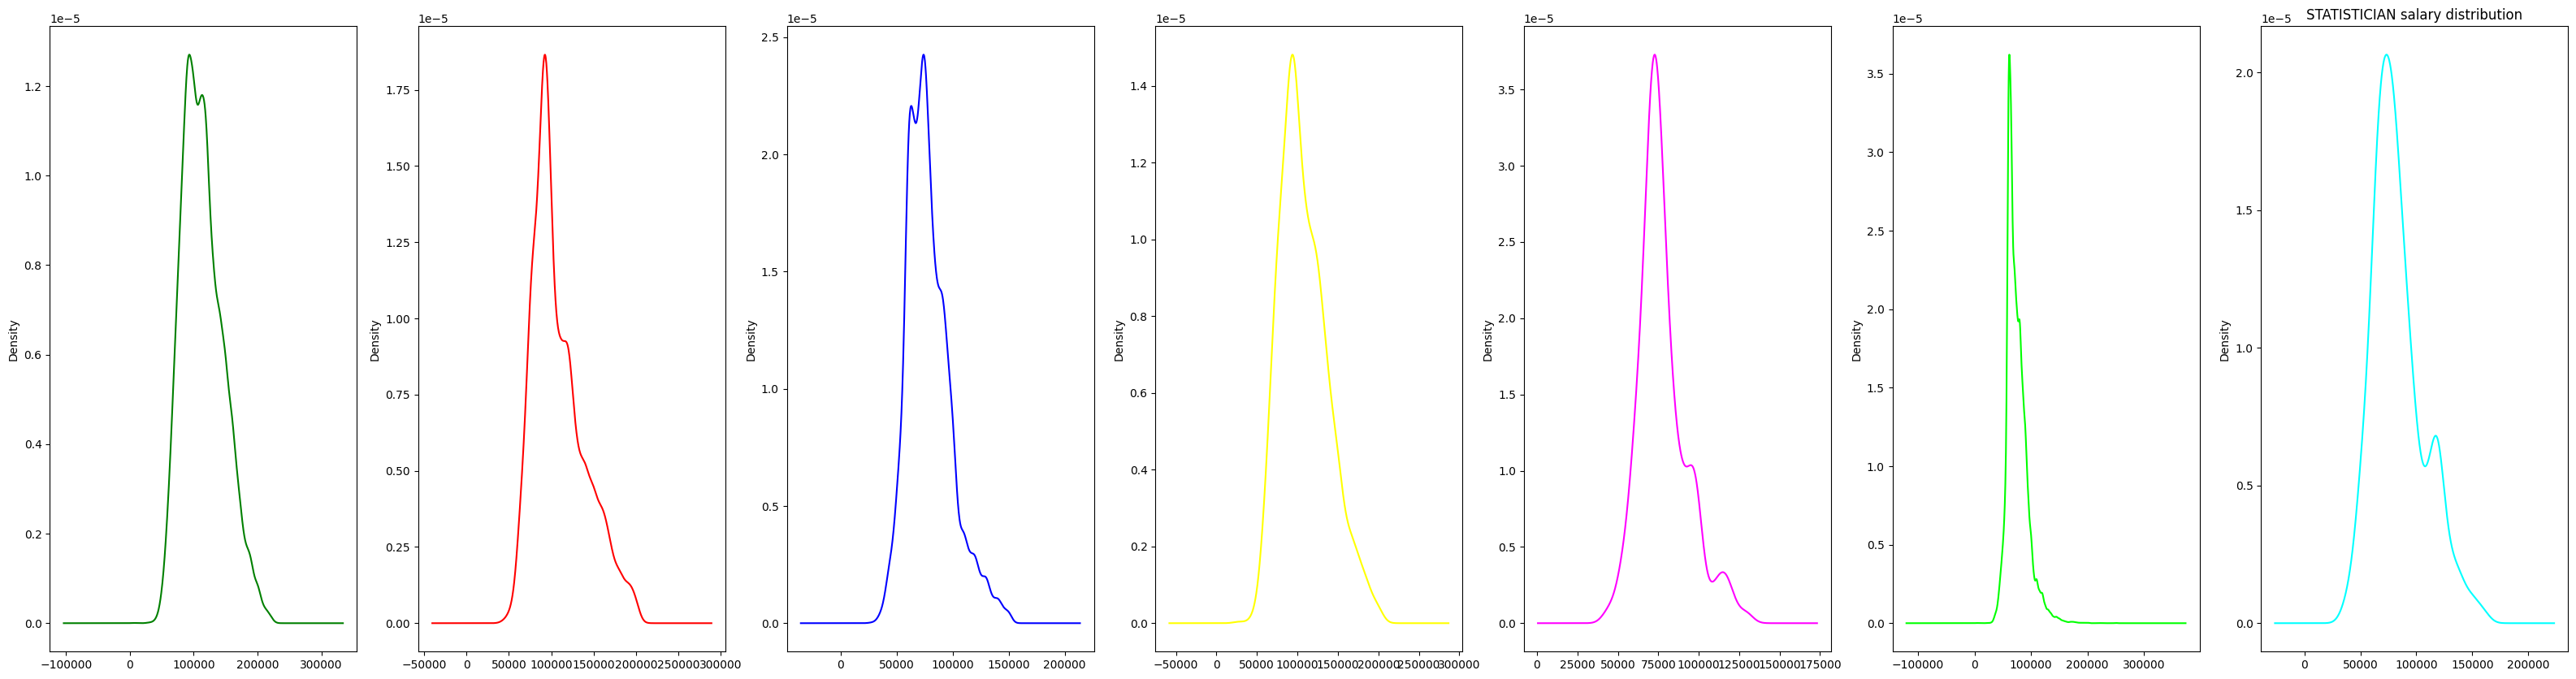

In [58]:
DS_JOBS = ["DATA SCIENTIST","DATA ENGINEER","DATA ANALYST","DATA ARCHITECT","BI ANALYST","BUSINESS ANALYST","STATISTICIAN"]
colors = ['green','red','blue','yellow','magenta','lime','cyan']
fig, axs = plt.subplots(1,7, figsize=(40,10))

for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_clean_df[ h1bdata_clean_df['title']== job ]['salary']
  z_score = np.abs(stats.zscore(tmp_df))
  outlier_free = tmp_df[ (z_score < 3)]
  outlier_free.plot(kind='density', ax= axs[i],color=colors[i])
  plt.title(f"{job} salary distribution")
  #plt.xlim([0,3e5])

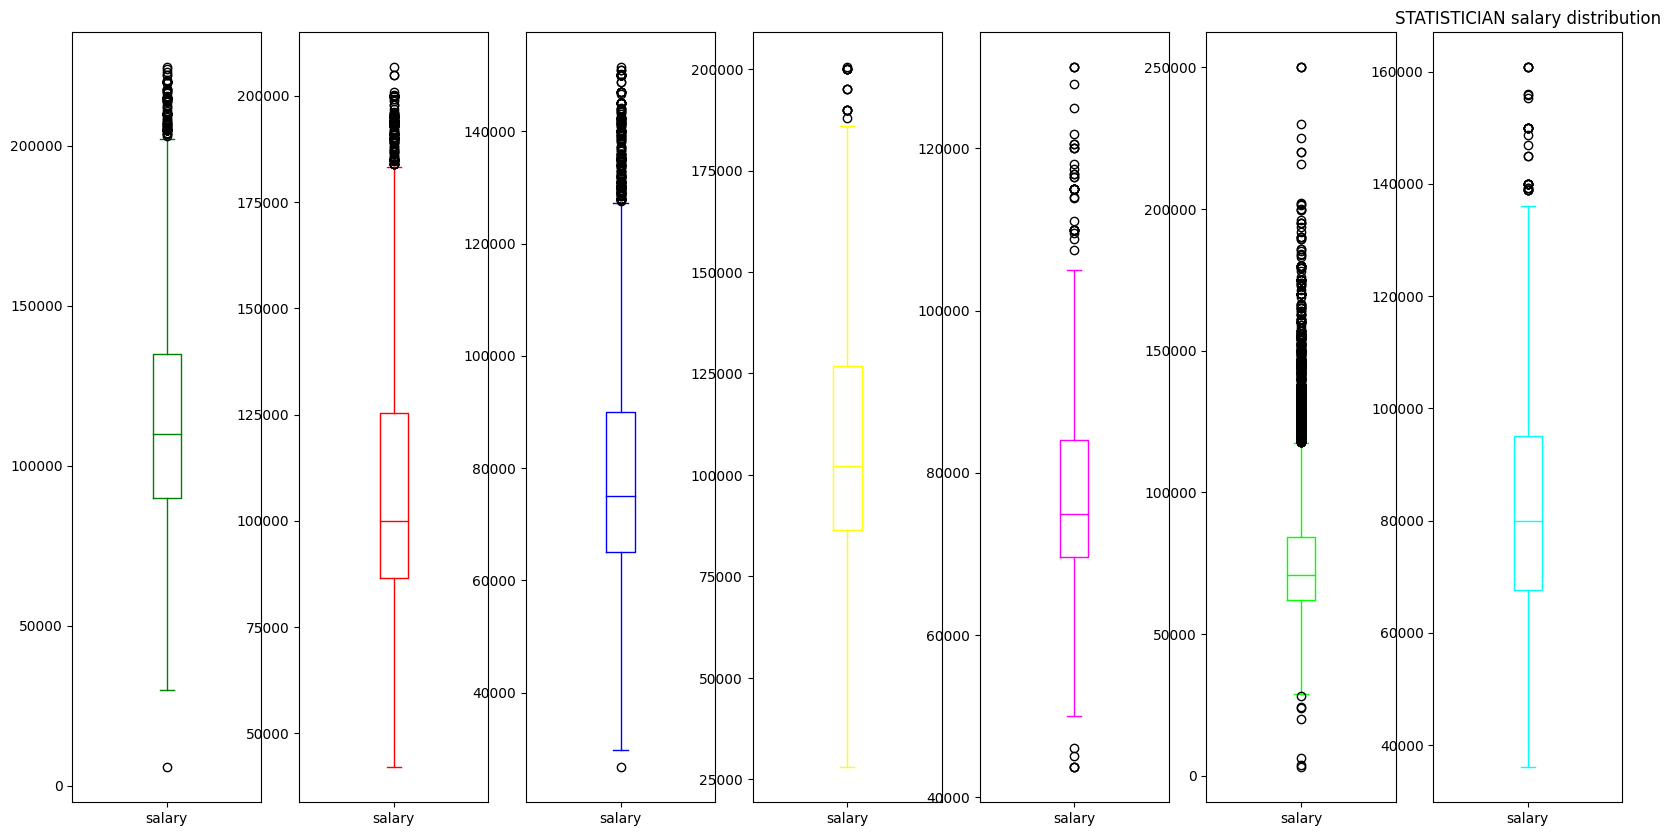

In [53]:
fig, axs = plt.subplots(1,7, figsize=(20,10))

for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_clean_df[ h1bdata_clean_df['title']== job ]['salary']
  z_score = np.abs(stats.zscore(tmp_df))
  outlier_free = tmp_df[ (z_score < 3)]
  outlier_free.plot(kind='box', ax= axs[i],color=colors[i])
  plt.title(f"{job} salary distribution")
  #plt.xlim([0,3e5])

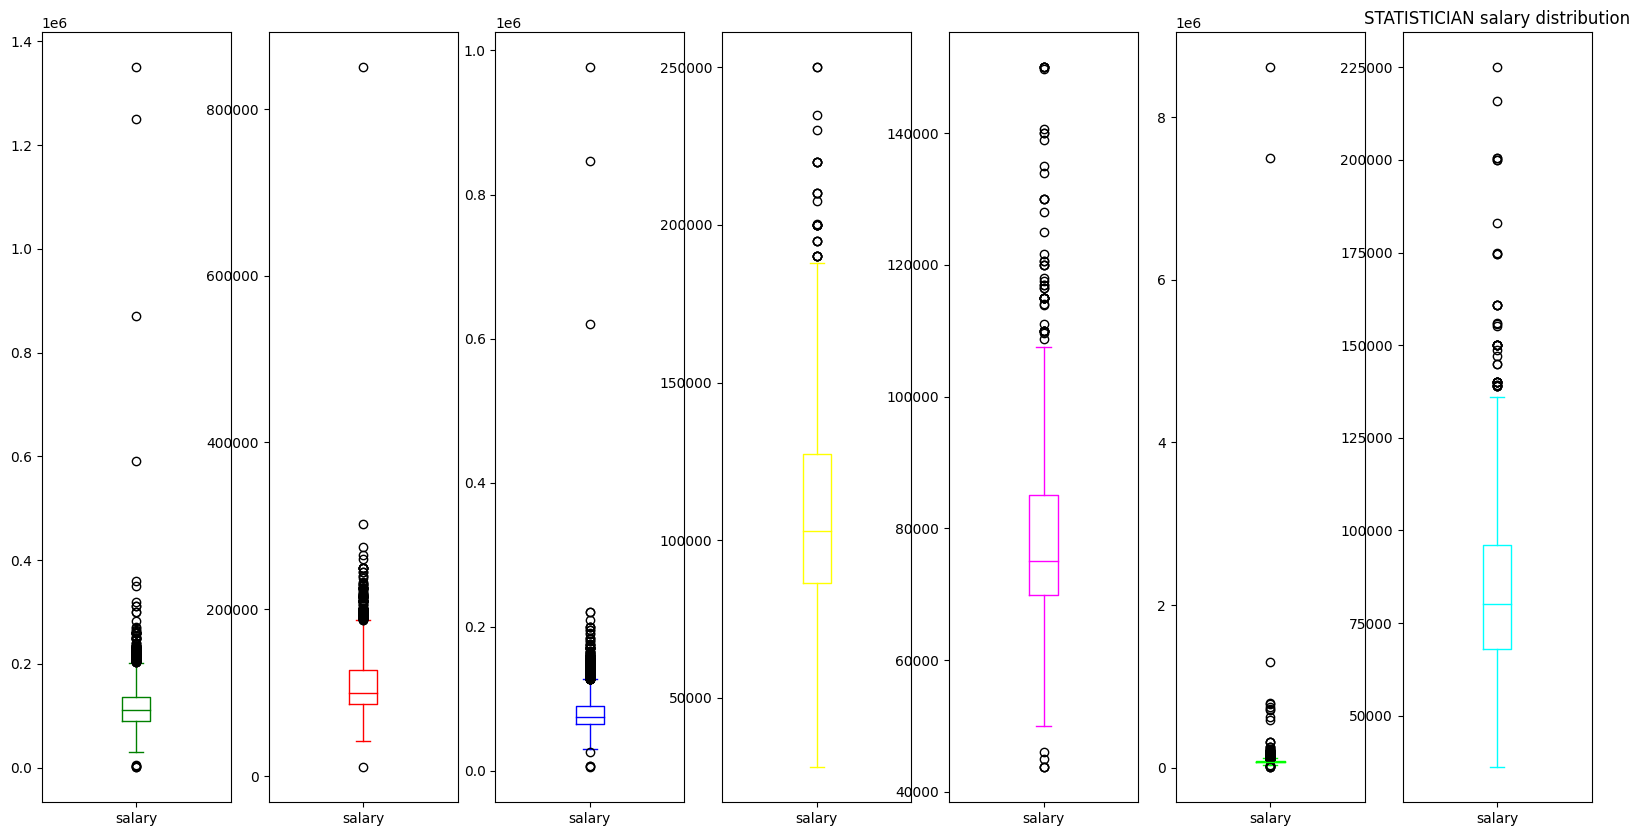

In [54]:
fig, axs = plt.subplots(1,7, figsize=(20,10))

for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_clean_df[ h1bdata_clean_df['title']== job ]['salary']
  z_score = np.abs(stats.zscore(tmp_df))
  outlier_free = tmp_df#[ (z_score < 3)]
  outlier_free.plot(kind='box', ax= axs[i],color=colors[i])
  plt.title(f"{job} salary distribution")
  #plt.xlim([0,3e5])

### Test With Interquantile Range

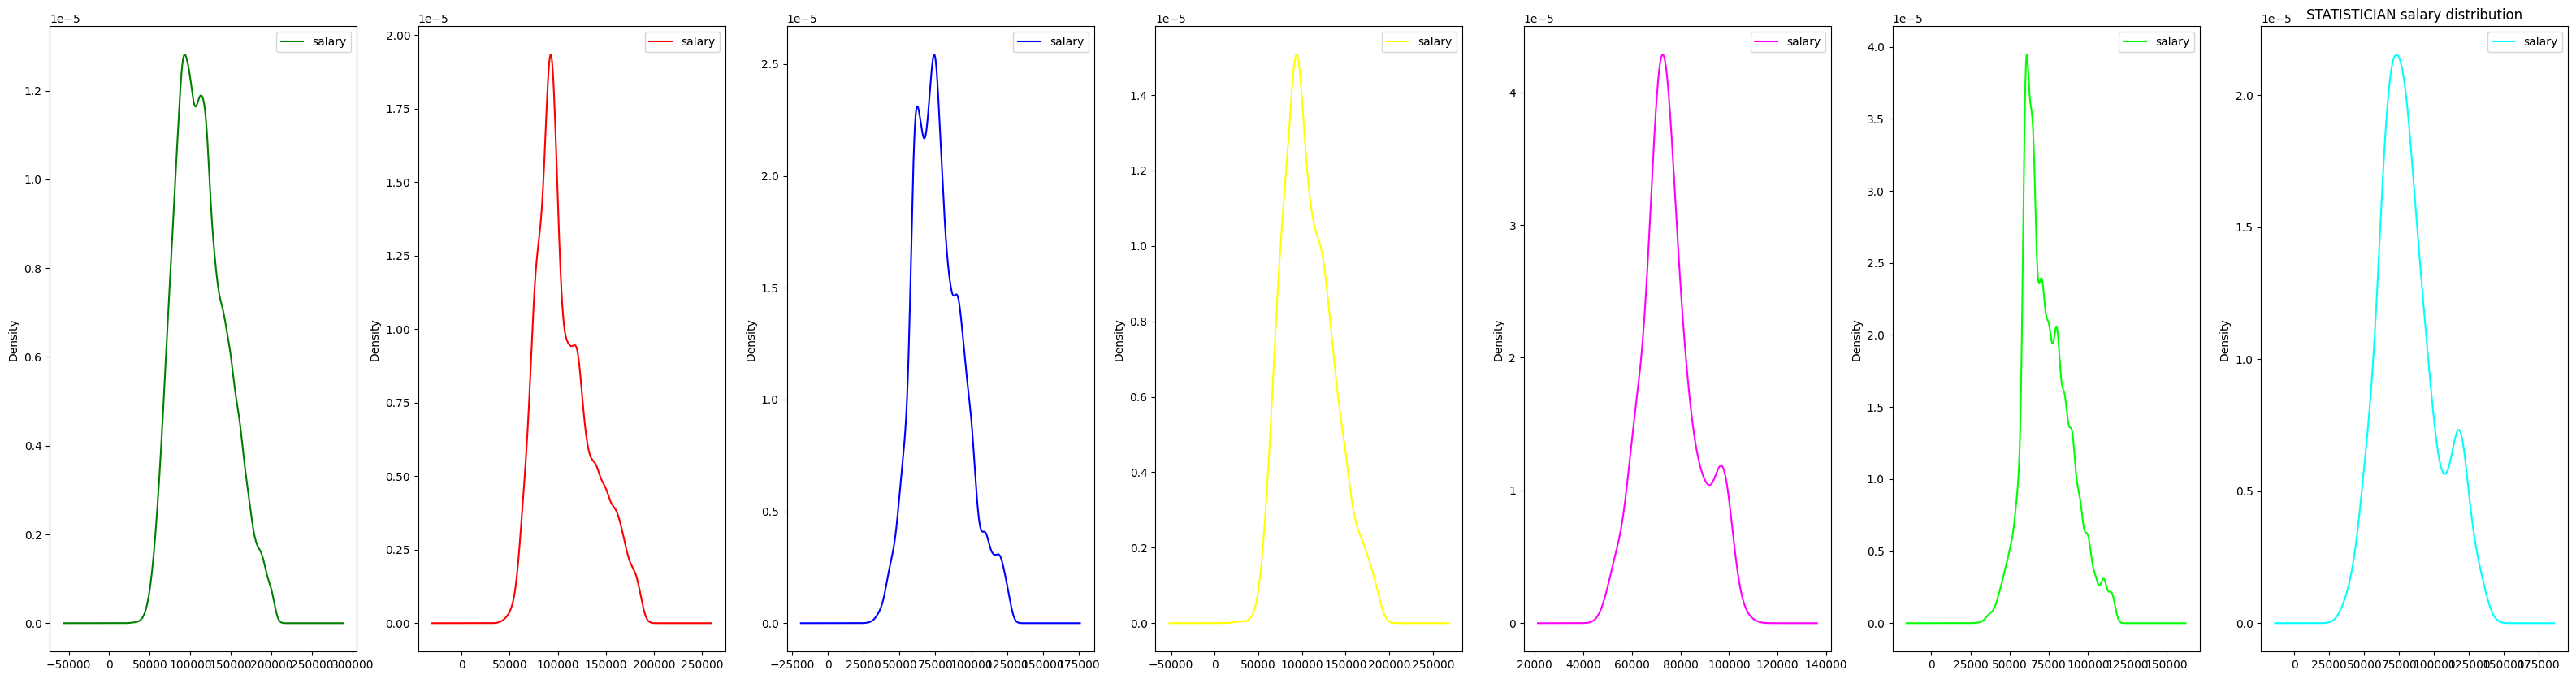

In [59]:

colors = ['green','red','blue','yellow','magenta','lime','cyan']
fig, axs = plt.subplots(1,7, figsize=(40,10))



for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_clean_df[ h1bdata_clean_df['title']== job ][['salary']]

  Q1 = tmp_df.quantile(0.25)
  Q3 = tmp_df.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
 
 
  outlier_free = tmp_df[~((tmp_df < (Q1 - 1.5 * IQR)) |(tmp_df > (Q3 + 1.5 * IQR))).any(axis=1) ]

  outlier_free.plot(kind='density', ax= axs[i],color=colors[i])
  plt.title(f"{job} salary distribution")
  #plt.xlim([0,3e5])

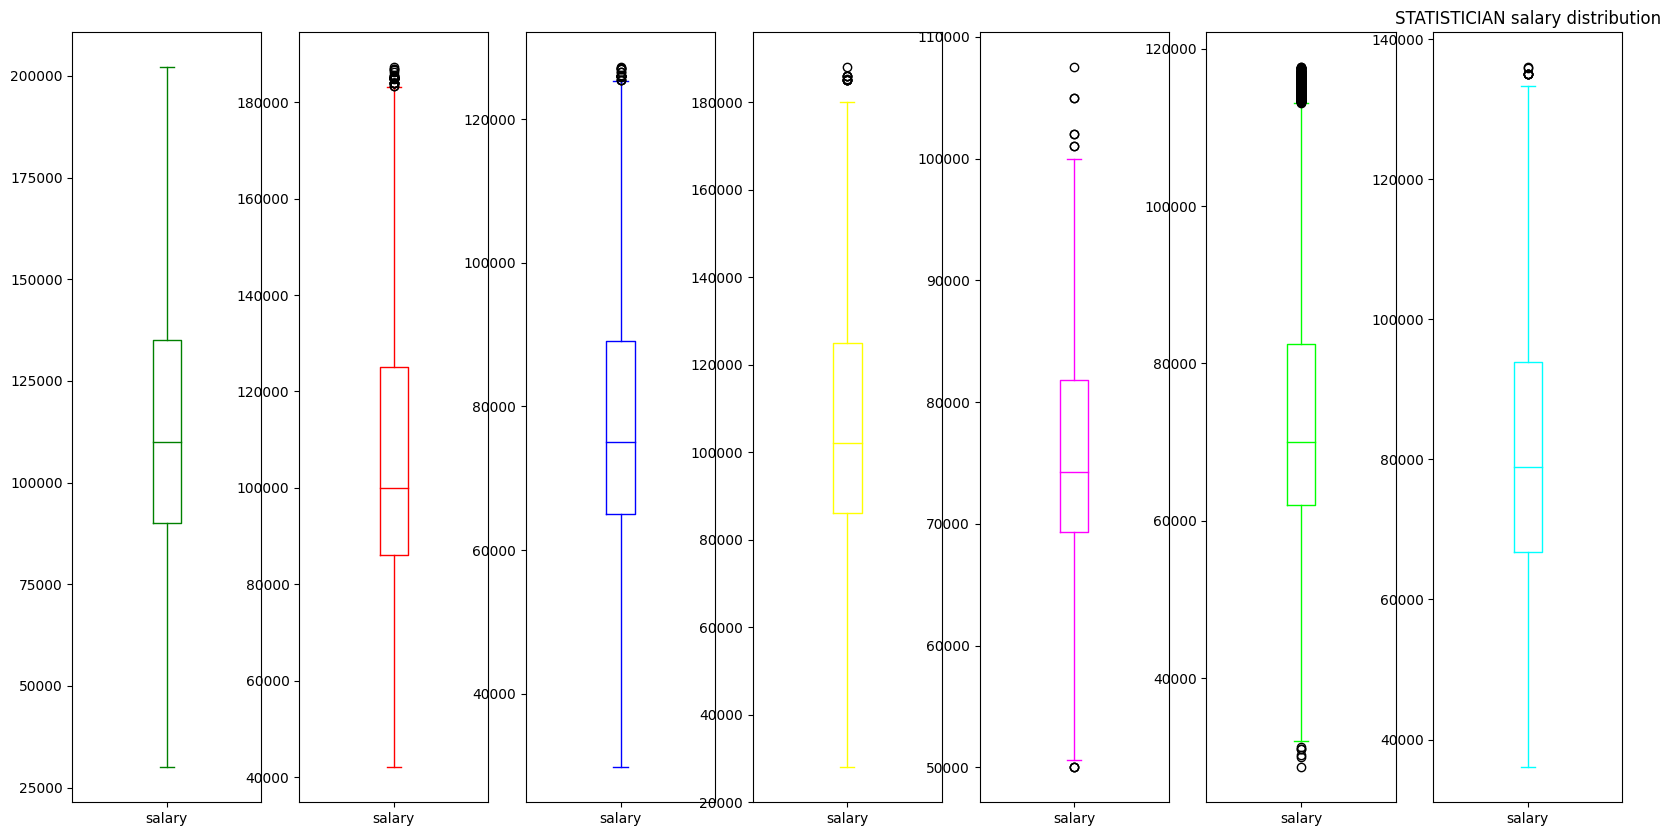

In [56]:
fig, axs = plt.subplots(1,7, figsize=(20,10))
for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_clean_df[ h1bdata_clean_df['title']== job ][['salary']]

  Q1 = tmp_df.quantile(0.25)
  Q3 = tmp_df.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
 
 
  outlier_free = tmp_df[~((tmp_df < (Q1 - 1.5 * IQR)) |(tmp_df > (Q3 + 1.5 * IQR))).any(axis=1) ]

  outlier_free.plot(kind='box', ax= axs[i],color=colors[i])
  plt.title(f"{job} salary distribution")
  #plt.xlim([0,3e5])

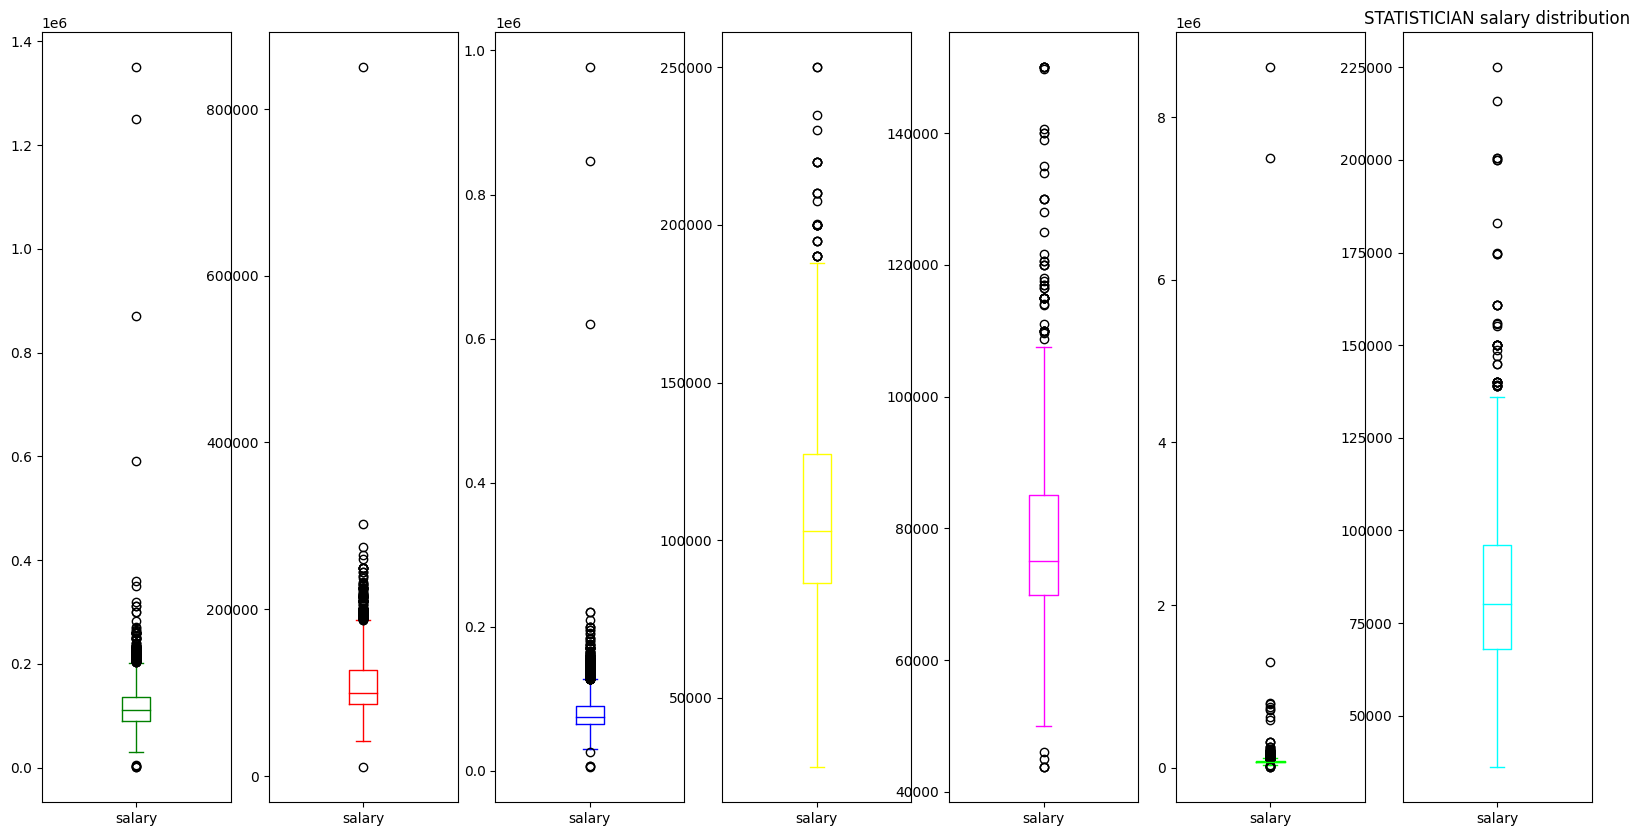

In [57]:
fig, axs = plt.subplots(1,7, figsize=(20,10))
for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_clean_df[ h1bdata_clean_df['title']== job ][['salary']]

  Q1 = tmp_df.quantile(0.25)
  Q3 = tmp_df.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
 
 
  outlier_free = tmp_df#[~((tmp_df < (Q1 - 1.5 * IQR)) |(tmp_df > (Q3 + 1.5 * IQR))).any(axis=1) ]

  outlier_free.plot(kind='box', ax= axs[i],color=colors[i])
  plt.title(f"{job} salary distribution")
  #plt.xlim([0,3e5])

In [66]:
outlier_free_df = pd.DataFrame({}, columns = h1bdata_clean_df.columns)
for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
  tmp_df = h1bdata_clean_df[ h1bdata_clean_df['title']== job ][['salary']]

  Q1 = tmp_df.quantile(0.25)
  Q3 = tmp_df.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outlier_free_for_a_job = tmp_df[~((tmp_df < (Q1 - 1.5 * IQR)) |(tmp_df > (Q3 + 1.5 * IQR))).any(axis=1) ]
  #cocat lines with no outlines per JOB
  tmp_outlier_free = h1bdata_clean_df[ h1bdata_clean_df['title']== job ][~((tmp_df < (Q1 - 1.5 * IQR)) |(tmp_df > (Q3 + 1.5 * IQR))).any(axis=1) ]
  outlier_free_df = pd.concat([outlier_free_df,tmp_outlier_free])

In [68]:
len(outlier_free_df)

80150

In [69]:
len(h1bdata_clean_df)

82395

In [73]:
outlier_free_df['title'].value_counts()

BUSINESS ANALYST    38318
DATA SCIENTIST      16770
DATA ANALYST        11277
DATA ENGINEER       10622
DATA ARCHITECT       1555
STATISTICIAN         1000
BI ANALYST            608
Name: title, dtype: int64

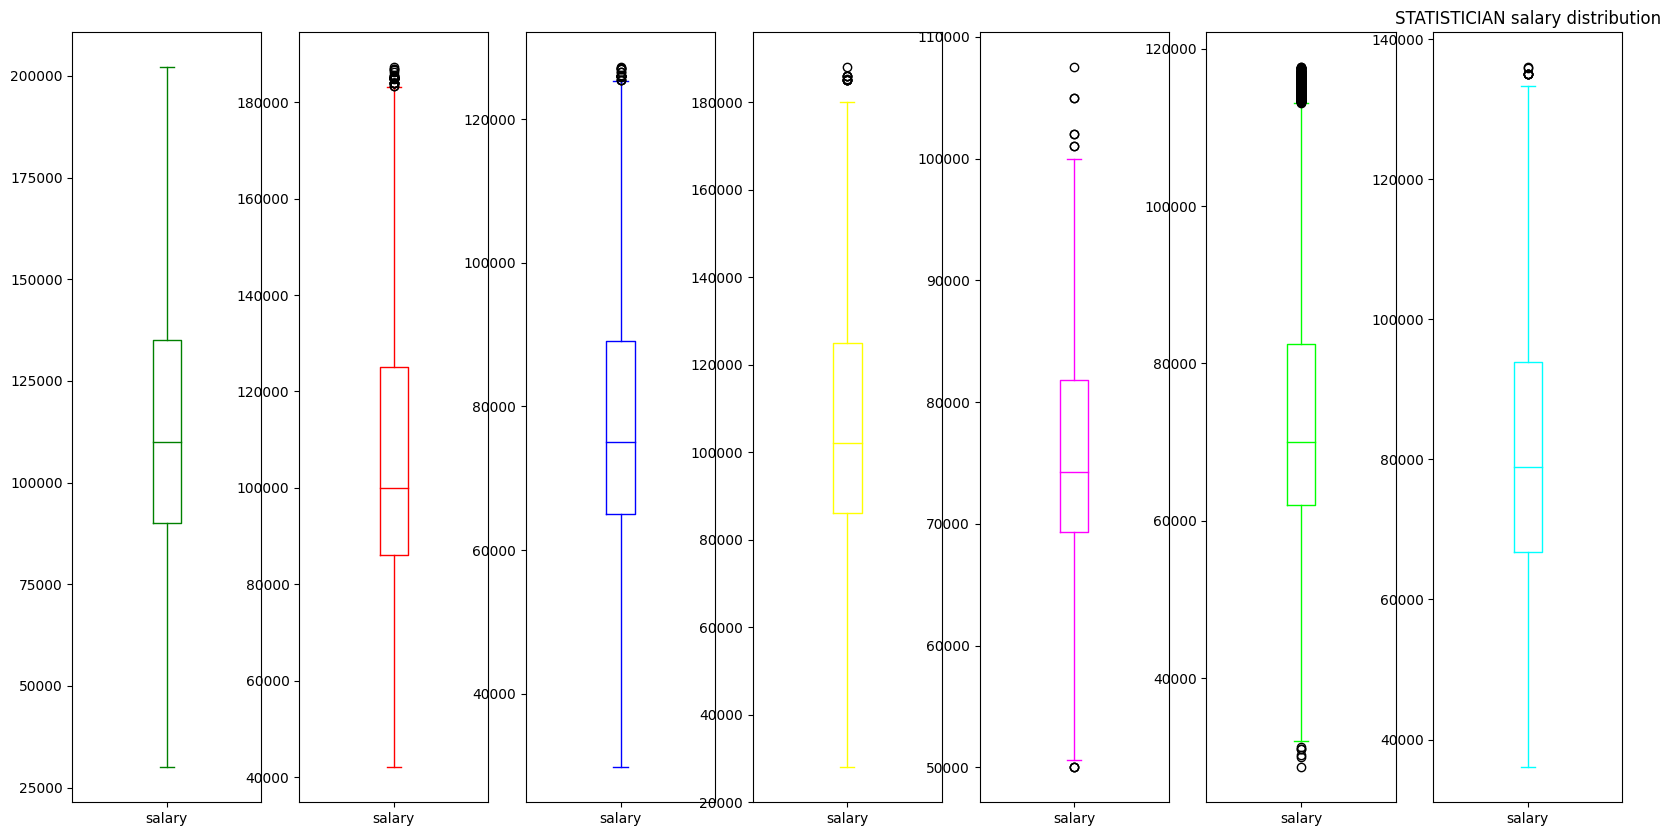

In [75]:
fig, axs = plt.subplots(1,7, figsize=(20,10))
for (i,job) in zip(range(0, len(DS_JOBS) ), DS_JOBS):
 
 
  outlier_free = outlier_free_df[outlier_free_df['title']== job]['salary']

  outlier_free.plot(kind='box', ax= axs[i],color=colors[i])
  plt.title(f"{job} salary distribution")
  #plt.xlim([0,3e5])

In [77]:
h1bdata_clean_df = outlier_free_df

In [78]:
h1bdata_clean_df

,Unnamed: 0,company,title,salary,location,date
0,45980.0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,45980.0,"ORLANDO, FL",04/09/2020
1,46060.0,PERCOLATA CORPORATION,DATA SCIENTIST,46060.0,"PALO ALTO, CA",03/18/2016
2,47960.0,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,"FORT LEE, NJ",02/18/2015
3,47960.0,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,"FORT LEE, NJ",02/18/2015
4,50000.0,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,50000.0,"JOHNS CREEK, GA",03/16/2017
...,...,...,...,...,...,...
82389,82389.0,TECHDATA SERVICE COMPANY LLC,STATISTICIAN,135000.0,"SOMERSET, NJ",08/27/2022
82390,82390.0,TECHDATA SERVICE COMPANY LLC,STATISTICIAN,135000.0,"SOMERSET, NJ",08/26/2022
82391,82391.0,WELLS FARGO SECURITIES LLC,STATISTICIAN,135000.0,"CHARLOTTE, NC",10/26/2015
82392,82392.0,ARION CAPITAL MANAGEMENT LLC,STATISTICIAN,135000.0,"BENSALEM, PA",03/13/2019


## Splitting Columns

In [79]:
h1bdata_clean_df['location']

0            ORLANDO, FL
1          PALO ALTO, CA
2           FORT LEE, NJ
3           FORT LEE, NJ
4        JOHNS CREEK, GA
              ...       
82389       SOMERSET, NJ
82390       SOMERSET, NJ
82391      CHARLOTTE, NC
82392       BENSALEM, PA
82393       SOMERSET, NJ
Name: location, Length: 80150, dtype: object

In [107]:
 h1bdata_clean_df[['city', 'state']]  =  h1bdata_clean_df['location'].str.split(', ', expand=True).iloc[:,:-1]

h1bdata_clean_df.drop('location', axis = 1 , inplace= True)


KeyError: ignored

In [110]:
h1bdata_clean_df['state'].unique()

array(['FL', 'CA', 'NJ', 'GA', 'IL', 'WI', 'TX', 'MA', 'MI', 'WA', 'DE',
       'MD', 'NY', 'VA', 'MO', 'NC', 'TN', 'MN', 'IN', 'PA', 'OH', 'IA',
       'AZ', 'CO', 'UT', 'LA', 'OK', 'AR', 'OR', 'KS', 'NH', 'NV', 'DC',
       'NE', 'CT', 'PR', 'KY', 'SC', 'AL', 'NM', 'MS', 'ND', 'RI', 'ID',
       'IL 60654', 'HI', 'WY', 'SD', 'VT', 'ME', 'SHOREVIEW', 'NJ 07642',
       'D.C.', 'WV', 'NY,', 'VT.', 'SAN RAMON,', 'ATLANTA', 'MT',
       'CA 95134', 'TX 77002', '5TH FL', 'AK', 'D.C', 'DC 20006', 'VI',
       'MINNEAPOLIS', 'ETS DRIVE', '', 'MO 63105', 'WASHINGTON',
       'NEW YORK'], dtype=object)

In [112]:
pd.DataFrame(h1bdata_clean_df[['state']].value_counts())

,0
state,
CA,16514
TX,8191
NY,7316
NJ,6932
IL,3912
...,...
MO 63105,1
"SAN RAMON,",1
5TH FL,1


In [113]:
pd.DataFrame(h1bdata_clean_df[['city']].value_counts())

,0
city,
NEW YORK,5259
SAN FRANCISCO,3074
CHICAGO,1657
MENLO PARK,1551
ATLANTA,1545
...,...
"MARIETTA,",1
MARGATE,1
MARCH ARB,1


### Map and replace 

In [126]:
map = {
    "DC 20006": "WA",
    "CA 95134": "CA",
    "WASHINGTON": "WA",
    "VT.": "VT"	,
    "TX 77002": "TX",
    "NJ 07642": "NJ",
    "IL 60654": "IL",
    "SHOREVIEW":"MN",
    "MINNEAPOLIS": "MN",
    "MO 63105":"MO",
    "SAN RAMON,":	"CA",
    "5TH FL": "FL",
    "NEW YORK": "NY",
    'NY,': "NY",
    "ETS DRIVE":"unkown",
    "D.C.":"WA",
    "D.C":"WA",
    "ATLANTA":"GA"

}

In [132]:
h1bdata_clean_df['state'] = h1bdata_clean_df['state'].replace(map)
h1bdata_clean_df['state'] = h1bdata_clean_df[  h1bdata_clean_df['state'] !='unkown']['state']


## Convert to date columns to date in right format

In [139]:
h1bdata_clean_df['date'] = pd.to_datetime(h1bdata_clean_df['date'], format ='%m/%d/%Y').dt.strftime('%d/%m/%Y')

## Conteplating the work of art

In [140]:
h1bdata_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80150 entries, 0 to 82393
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  80150 non-null  float64
 1   company     80150 non-null  object 
 2   title       80150 non-null  object 
 3   salary      80150 non-null  float64
 4   date        80150 non-null  object 
 5   city        80150 non-null  object 
 6   state       80149 non-null  object 
dtypes: float64(2), object(5)
memory usage: 6.9+ MB


In [141]:
h1bdata_clean_df.head(30)

,Unnamed: 0,company,title,salary,date,city,state
0,45980.0,FORTRESS INFORMATION SECURITY LLC,DATA SCIENTIST,45980.0,09/04/2020,ORLANDO,FL
1,46060.0,PERCOLATA CORPORATION,DATA SCIENTIST,46060.0,18/03/2016,PALO ALTO,CA
2,47960.0,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,18/02/2015,FORT LEE,NJ
3,47960.0,MY LIFE REGISTRY LLC,DATA SCIENTIST,47960.0,18/02/2015,FORT LEE,NJ
4,50000.0,BIG DATA ANALYTICS TRADING INC,DATA SCIENTIST,50000.0,16/03/2017,JOHNS CREEK,GA
5,50220.0,YONO HEALTH INC,DATA SCIENTIST,50220.0,28/02/2017,SUNNYVALE,CA
6,51100.0,EONUM INC,DATA SCIENTIST,51100.0,08/04/2021,IRVINE,CA
7,51100.0,EONUM INC,DATA SCIENTIST,51100.0,12/04/2021,IRVINE,CA
8,51100.0,EONUM INC,DATA SCIENTIST,51100.0,16/04/2021,IRVINE,CA
9,51860.0,OPEN DATA GROUP INC,DATA SCIENTIST,51860.0,28/02/2019,CHICAGO,IL
